# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
!git clone https://github.com/jagadeeshrao/INFO-5731.021-13466-Daggu-Jagadeesh-Rao

Cloning into 'INFO-5731.021-13466-Daggu-Jagadeesh-Rao'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), 1.36 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import pandas as pd
df=pd.read_csv('INFO-5731.021-13466-Daggu-Jagadeesh-Rao/openheimer_reviews_cleaned_data.csv')
df.head()

,Review content,clean Review content,POS_counts,Entities,Entity_counts
0,One of the most anticipated films of the year ...,one anticipated film year many people included...,"Counter({'NOUN': 58, 'VERB': 50, 'ADJ': 31, 'A...","['one', 'three hour', 'christopher', 'dunkirk'...","Counter({'CARDINAL': 3, 'PERSON': 3, 'ORDINAL'..."
1,You'll have to have your wits about you and yo...,youll wit brain fully switched watching oppenh...,"Counter({'NOUN': 49, 'ADJ': 30, 'VERB': 20, 'A...","['germany', 'cillian murphy', 'decade', 'the h...","Counter({'GPE': 1, 'PERSON': 1, 'DATE': 1, 'TI..."
2,I'm a big fan of Nolan's work so was really lo...,im big fan nolans work really looking forward ...,"Counter({'VERB': 26, 'NOUN': 22, 'ADJ': 12, 'A...",['day'],Counter({'DATE': 1})
3,"""Oppenheimer"" is a biographical thriller film ...",oppenheimer biographical thriller film written...,"Counter({'NOUN': 338, 'VERB': 167, 'ADJ': 142,...","['christopher', 'american prometheus kai', 'ma...","Counter({'PERSON': 21, 'CARDINAL': 6, 'ORDINAL..."
4,This movie is just... wow! I don't think I hav...,this movie wow i dont think i ever felt like w...,"Counter({'NOUN': 32, 'VERB': 23, 'ADV': 16, 'A...","['christopher nolan', 'one', 'one', 'cillian',...","Counter({'CARDINAL': 3, 'PERSON': 2, 'NORP': 1})"


In [ ]:
cleaned_reviews=df["clean Review content"]

In [ ]:
import re

#function to convert sentences to words(tokens)
def tokenize(input1):
    return re.findall(r'\b\w+\b', input1.lower())

def count_ngrams(tokens_12, n):
    ngrams_12 = {}
    for i in range(len(tokens_12) - n + 1):
        ngram_12 = tuple(tokens_12[i:i+n])
        ngrams_12[ngram_12] = ngrams_12.get(ngram_12, 0) + 1
    return ngrams_12

def calculate_bigram_probabilities(bigrams, unigrams):
    probabilities_12 = {}
    for each_bigram in bigrams:
        w1 = each_bigram[0]
        probabilities_12[each_bigram] = bigrams[each_bigram] / unigram_frequencies[(w1,)]
    return probabilities_12

def extract_potential_noun_phrases(tokens):
    # Simplified noun phrase extraction: consider each bigram as a potential noun phrase
    return count_ngrams(tokens, 2)

# Process each review
trigram_frequencies = {}
bigram_frequencies = {}
unigram_frequencies = {}
all_noun_phrases = {}

# Count n-grams and noun phrases across all reviews
for review in cleaned_reviews:
    tokens = tokenize(review)
    trigrams = count_ngrams(tokens, 3)
    bigrams = count_ngrams(tokens, 2)
    unigrams = count_ngrams(tokens, 1)

    # Update global counts
    for trigram, count in trigrams.items():
        trigram_frequencies[trigram] = trigram_frequencies.get(trigram, 0) + count
    for bigram, count in bigrams.items():
        bigram_frequencies[bigram] = bigram_frequencies.get(bigram, 0) + count
    for unigram, count in unigrams.items():
        unigram_frequencies[unigram] = unigram_frequencies.get(unigram, 0) + count
    for bigram in bigrams:
        all_noun_phrases[bigram] = all_noun_phrases.get(bigram, []) + [bigrams[bigram]]

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(bigram_frequencies, unigrams)

# Calculate relative probabilities for noun phrases in each review
for bigram in all_noun_phrases:
    max_frequency = max(all_noun_phrases[bigram])
    all_noun_phrases[bigram] = [freq / max_frequency for freq in all_noun_phrases[bigram]]

# Printing results

print("Trigram Frequencies:", trigram_frequencies)

print("Bigram Probabilities:", bigram_probabilities)


# For a better display of the noun phrase relative probabilities, a pandas DataFrame would be ideal
# However, since we are not using any libraries, we will print a simple text table
print("\nNoun Phrase Relative Probabilities:")

# Print column headers
print("\t".join(["Noun Phrase"] + ["Review " + str(i+1) for i in range(len(cleaned_reviews))]))

# Print each row
for bigram, relative_probs in all_noun_phrases.items():
    print("\t".join([str(bigram)] + [str(prob) for prob in relative_probs]))


Trigram Frequencies: {('one', 'anticipated', 'film'): 40, ('anticipated', 'film', 'year'): 40, ('film', 'year', 'many'): 40, ('year', 'many', 'people'): 40, ('many', 'people', 'included'): 40, ('people', 'included', 'oppenheimer'): 40, ('included', 'oppenheimer', 'largely'): 40, ('oppenheimer', 'largely', 'delivers'): 40, ('largely', 'delivers', 'much'): 40, ('delivers', 'much', 'great'): 40, ('much', 'great', 'i'): 40, ('great', 'i', 'feel'): 40, ('i', 'feel', 'like'): 120, ('feel', 'like', 'i'): 80, ('like', 'i', 'loved'): 40, ('i', 'loved', 'two'): 40, ('loved', 'two', 'three'): 40, ('two', 'three', 'hour'): 40, ('three', 'hour', 'liked'): 40, ('hour', 'liked', 'hour'): 40, ('liked', 'hour', 'fact'): 40, ('hour', 'fact', 'stop'): 40, ('fact', 'stop', 'adoring'): 40, ('stop', 'adoring', 'entire'): 40, ('adoring', 'entire', 'thing'): 40, ('entire', 'thing', 'i'): 40, ('thing', 'i', 'know'): 40, ('i', 'know', 'christopher'): 40, ('know', 'christopher', 'nolans'): 40, ('christopher', 'n

Saving Output in csv file

In [ ]:
csv_file = "noun_phrase_relative_probabilities.csv"
import csv
with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Noun Phrase"] + ["Review " + str(i+1) for i in range(len(cleaned_reviews))])
    # Write each row
    for bigram, relative_probs in all_noun_phrases.items():
        writer.writerow([" ".join(bigram)] + [prob for prob in relative_probs])

# Assuming that the above dictionary `all_noun_phrases` and list `cleaned_reviews` are available
# from the previous steps of your NLP processing and you now have a CSV file with the data.

# Let's read the CSV file and display the first 5 rows
with open(csv_file, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    # Read and display the first 5 rows, including the header
    for i, row in enumerate(reader):
        if i > 5:
            break
        print(row)


['Noun Phrase', 'Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 5', 'Review 6', 'Review 7', 'Review 8', 'Review 9', 'Review 10', 'Review 11', 'Review 12', 'Review 13', 'Review 14', 'Review 15', 'Review 16', 'Review 17', 'Review 18', 'Review 19', 'Review 20', 'Review 21', 'Review 22', 'Review 23', 'Review 24', 'Review 25', 'Review 26', 'Review 27', 'Review 28', 'Review 29', 'Review 30', 'Review 31', 'Review 32', 'Review 33', 'Review 34', 'Review 35', 'Review 36', 'Review 37', 'Review 38', 'Review 39', 'Review 40', 'Review 41', 'Review 42', 'Review 43', 'Review 44', 'Review 45', 'Review 46', 'Review 47', 'Review 48', 'Review 49', 'Review 50', 'Review 51', 'Review 52', 'Review 53', 'Review 54', 'Review 55', 'Review 56', 'Review 57', 'Review 58', 'Review 59', 'Review 60', 'Review 61', 'Review 62', 'Review 63', 'Review 64', 'Review 65', 'Review 66', 'Review 67', 'Review 68', 'Review 69', 'Review 70', 'Review 71', 'Review 72', 'Review 73', 'Review 74', 'Review 75', 'Review 76', 'Revi

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Using the movie reviews dataset which we downloaded from assignment 2 in previous question
cleaned_reviews=df["clean Review content"]

In [ ]:
import math
import re
from collections import defaultdict

# Step 1: Read in the data (You'll upload 'myData.csv' to Colab or access it via Google Drive)
def read_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reviews = file.readlines()
    # Assume first line is header and each following line is a document
    return [line.strip().split(",")[1] for line in reviews[1:]]

# Tokenization and normalization
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculate term frequencies
def term_frequencies(documents):
    tf = []
    for doc in documents:
        tf_doc = defaultdict(int)
        tokens = tokenize(doc)
        for token in tokens:
            tf_doc[token] += 1
        tf.append(tf_doc)
    return tf

# Calculate inverse document frequency
def inverse_document_frequency(documents):
    idf = defaultdict(int)
    num_docs = len(documents)
    for doc in documents:
        tokens = set(tokenize(doc))
        for token in tokens:
            idf[token] += 1
    for token, freq in idf.items():
        idf[token] = math.log(num_docs / float(freq))
    return idf

# Building TF-IDF matrix
def tf_idf_matrix(documents):
    tf = term_frequencies(documents)
    idf = inverse_document_frequency(documents)
    tf_idf = []
    for tf_doc in tf:
        tf_idf_doc = {term: freq * idf[term] for term, freq in tf_doc.items()}
        tf_idf.append(tf_idf_doc)
    return [tf_idf,idf]

# Cosine similarity calculation
def dot_product(v1, v2):
    return sum(v1.get(k, 0) * v2.get(k, 0) for k in v1)

def magnitude(vector):
    return math.sqrt(dot_product(vector, vector))

def cosine_similarity(v1, v2):
    return dot_product(v1, v2) / (magnitude(v1) * magnitude(v2))

# Rank documents based on query
def rank_documents(tf_idf, query):
    query_tokens = tokenize(query)
    query_tf = defaultdict(int)
    for token in query_tokens:
        query_tf[token] += 1
    query_vector = {term: query_tf[term] * idf.get(term, 0) for term in query_tokens}

    rankings = []
    for index, doc_vector in enumerate(tf_idf):
        sim = cosine_similarity(query_vector, doc_vector)
        rankings.append((index, sim))
    return sorted(rankings, key=lambda x: x[1], reverse=True)


# Build TF-IDF matrix
tf_idf,idf = tf_idf_matrix(cleaned_reviews)

# Design your query
query = "It is outstanding movie with a haunting performance"

# Rank documents based on the query
rankings = rank_documents(tf_idf, query)

# Print ranked documents (indices and similarity scores)
for index, score in rankings:
    print(f"Document {index} — Score: {score}")

Document 17 — Score: 0.07853420275220713
Document 42 — Score: 0.07853420275220713
Document 67 — Score: 0.07853420275220713
Document 92 — Score: 0.07853420275220713
Document 117 — Score: 0.07853420275220713
Document 142 — Score: 0.07853420275220713
Document 167 — Score: 0.07853420275220713
Document 192 — Score: 0.07853420275220713
Document 217 — Score: 0.07853420275220713
Document 242 — Score: 0.07853420275220713
Document 267 — Score: 0.07853420275220713
Document 292 — Score: 0.07853420275220713
Document 317 — Score: 0.07853420275220713
Document 342 — Score: 0.07853420275220713
Document 367 — Score: 0.07853420275220713
Document 392 — Score: 0.07853420275220713
Document 417 — Score: 0.07853420275220713
Document 442 — Score: 0.07853420275220713
Document 467 — Score: 0.07853420275220713
Document 492 — Score: 0.07853420275220713
Document 517 — Score: 0.07853420275220713
Document 542 — Score: 0.07853420275220713
Document 567 — Score: 0.07853420275220713
Document 592 — Score: 0.07853420275220

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
#insralling gensim
!pip install gensim

In [ ]:
#import required libraries
import gensim
from gensim.models import Word2Vec
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [ ]:
#import dataset
#using data downloaded in first question

# Preprocessing the text and tokenizing
def preprocess_text(text):
    return gensim.utils.simple_preprocess(text)

df['processed_reviews'] = df['clean Review content'].apply(preprocess_text)
sentences = df['processed_reviews'].tolist()

In [ ]:
#Traing 300 dimension word2vec model and saving it
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

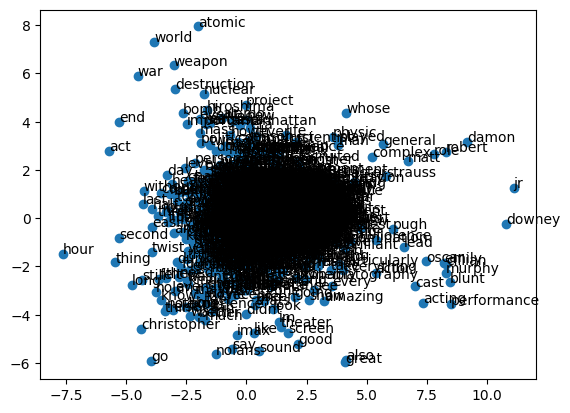

In [ ]:
#visualizing word embedding model
# Retrieve all vectors from the trained model
X = model.wv[model.wv.index_to_key]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot the result of PCA
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

# Annotate the points on the graph with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/jagadeeshrao/INFO-5731.021-13466-Daggu-Jagadeesh-Rao/blob/main/openheimer_reviews_with_sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
# It took me more than 10 hours to read all the records (1000) of the dataset, and analyse the sentiment.
#Except that challenge, everything was very good and easy to understand and solve